<a href="https://colab.research.google.com/github/Graur/mipt/blob/master/production_ml_graur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашняя работа №2: Финальное задание (исполнитель: Граур Андрей)

### Описание задачи:

Маркетинговые агенства хотят проводить успешные рекламные кампании, но рынок сложен, что требует оценивать эффективности разных вариантов, что обуславливает необходимость проведения АБ-тестирования.


### Компании заинтересованы в ответах на два вопроса:

1) Будет ли кампания успешной?
2) Если кампания была успешной, насколько этот успех можно объяснить рекламой?
Чтобы ответить на второй вопрос, мы обычно проводим A/B тестирование.

Большинство людей будут видеть рекламу (экспериментальная группа). А небольшая часть людей (контрольная группа) вместо этого увидит объявление государственной службы (PSA) (или ничего) точно такого же размера и в том же месте, где обычно находится реклама.

Идея задания состоит в том, чтобы проанализировать группы, выяснить, была ли реклама успешной, сколько компания может заработать на рекламе и является ли разница между группами статистически значимой.

### Словарь данных:
- user id: Идентификатор пользователя (уникальный).
- test group: Если "ad", то человек видел рекламу, если "psa", то он видел только объявление государственной службы.
- converted: Если человек купил продукт, то True, иначе False.
- total ads: Количество рекламы, увиденной человеком.
- most ads day: День, в который человек увидел наибольшее количество рекламы.
- most ads hour: Час дня, в который человек увидел наибольшее количество рекламы.

### Задачи:

#### 1) Проанализируйте структуру данных и проведите их предобработку:
- Исследуйте структуру данных;
- Преобразуйте столбцы к необходимым типам данных.
- Проверьте данные на наличие пропусков и избавьтесь от них, если нужно.
- Проверьте, есть ли пользователи, которые в процессе A/B теста попали в обе группы. Если да, исключите пользователей, оказавшихся в обеих группах.

#### 2) Сделайте первичный анализ результатов A/B-тестирования
- Рассчитайте вспомогательные показатели для контрольной и тестовой групп:

 - количество посещений сайта;
 - суммарное количество совершённых покупок;

Сделайте промежуточные выводы по построенной таблице. Сопоставимо ли количество посещений обоих вариантов посадочной страницы? Можно ли говорить о сбалансированности выборок?

- В каждой из групп рассчитайте ключевые показатели:

 - конверсия;
 - среднее количество рекламы, увиденной пользователем.

Сделайте первичные выводы о результатах A/B-тестирования на основе показателей конверсии и среднего количества увиденной рекламы в каждой из групп. По какому(-им) показателю(-ям), на первый взгляд, вариант А эффективнее варианта B и наоборот?

#### 3) Проведите статистический анализ результатов A/B-тестирования

- Сформулируйте статистические гипотезы, соответствующие поставленным бизнес-вопросам, и выберите статистический тест для их проверки.

Не забудьте проверить данные на нормальность там, где это необходимо.

- С помощью аппарата статистических тестов определите:
 - Есть ли статистическая разница между конверсиями в группах А и B?
 - Есть ли статистическая разница между средними количествами увиденной рекламы в группах А и B?

- Подкрепите результаты статистических тестов, построив 95 % доверительные интервалы для:
 - конверсий в каждой из групп;
 - разницы конверсий в группах;
 - среднего количества увиденной рекламы в группах А и B.

- Проинтерпретируйте построенные доверительные интервалы для конверсий и среднего количества увиденной рекламы группах. Есть ли перекрытие между доверительными интервалами для групп? Если есть, то о чём это говорит?

### 1 Предобработка данных


### 1.1 Скачаем необходимые нам билиотеки

In [13]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 Скачаем датасет

In [2]:
path = '/content/data.zip'
! wget https://lms.skillfactory.ru/asset-v1:SkillFactory+MFTIBIO+SEP2023+type@asset+block@AB-tests_HW.zip -O {path}

--2023-12-24 13:06:53--  https://lms.skillfactory.ru/asset-v1:SkillFactory+MFTIBIO+SEP2023+type@asset+block@AB-tests_HW.zip
Resolving lms.skillfactory.ru (lms.skillfactory.ru)... 51.250.7.2
Connecting to lms.skillfactory.ru (lms.skillfactory.ru)|51.250.7.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5488727 (5.2M) [application/zip]
Saving to: ‘/content/data.zip’

/content/data.zip   100%[===================>]   5.23M  13.2MB/s    in 0.4s    

2023-12-24 13:06:54 (13.2 MB/s) - ‘/content/data.zip’ saved [5488727/5488727]



In [3]:
! unzip {path}

Archive:  /content/data.zip
  inflating: marketing_AB.csv        


### 1.3 Проверим датасет и провалидируем его

In [5]:
dataframe = pd.read_csv("marketing_AB.csv")
dataframe.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [7]:
dataframe.describe(include="all")


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279668,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


#### Промежуточные вывод: У нас есть 6 различных фич, некоторые из них имеют тип int, 2 функции являются строками, а преобразованная функция имеет логический тип. Так же есть фича Unnamed, которая похоже не несет никакой смысловой нагрузки и от которой можно избавиться при очистке данных.

In [8]:
dataframe.shape

(588101, 7)

In [9]:
dataframe.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

### 1.4 Очистка данных

In [10]:
print("Is NA?")
print(dataframe.isna().sum())
print("Is NULL?")
print(dataframe.isnull().sum())

Is NA?
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64
Is NULL?
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


In [12]:
# Как описывал выше, удалим колонку Unnamed
dataframe.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
# Изменим тип данных данной колнки
dataframe["converted"] = np.where(dataframe["converted"]==True, 1, 0)


In [19]:
dataframe.duplicated().sum()

0

In [21]:
dataframe[dataframe["user id"].duplicated()].count()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

#### Промежуточный вывод: Набор данных не содержит повторяющихся строк, а это значит, что нам не придется выполнять сложные процедуры очистки данных.

In [23]:
dataframe.isnull().any()

user id          False
test group       False
converted        False
total ads        False
most ads day     False
most ads hour    False
dtype: bool

### 2. EDA

ad     564577
psa     23524
Name: test group, dtype: int64


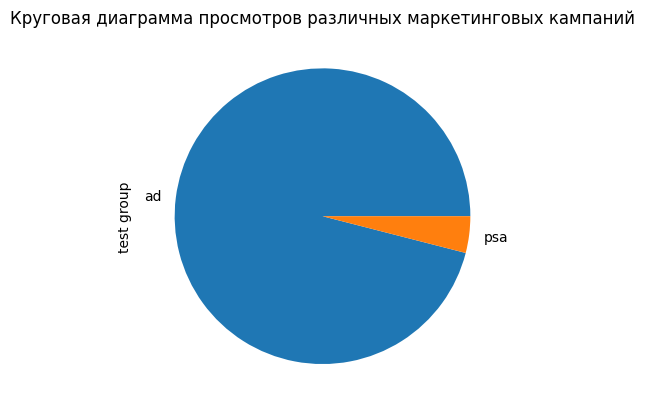

In [24]:
print(dataframe["test group"].value_counts())

ax = dataframe["test group"].value_counts().plot(kind="pie")
ax.set_title('Круговая диаграмма просмотров различных маркетинговых кампаний')
plt.show()

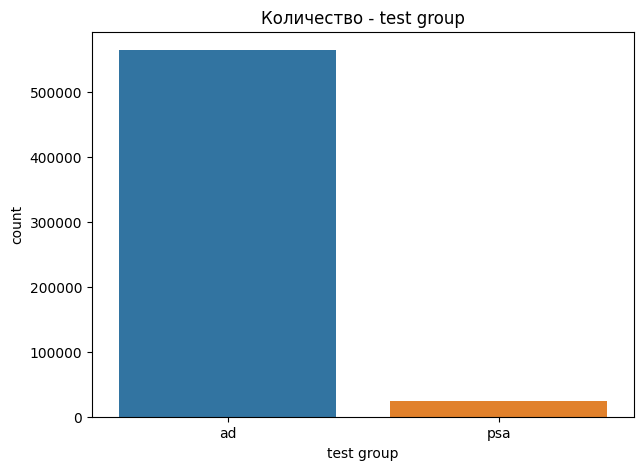

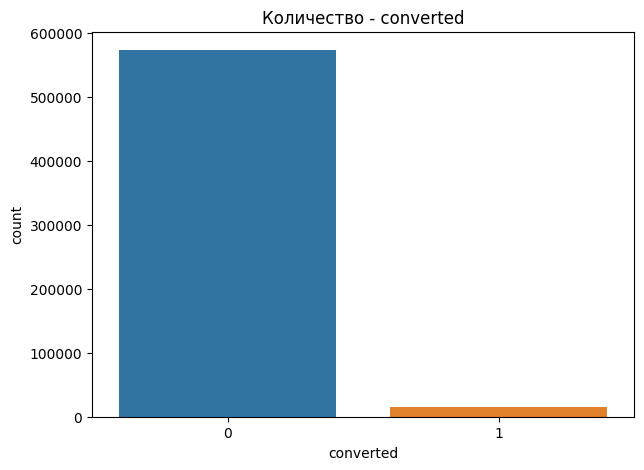

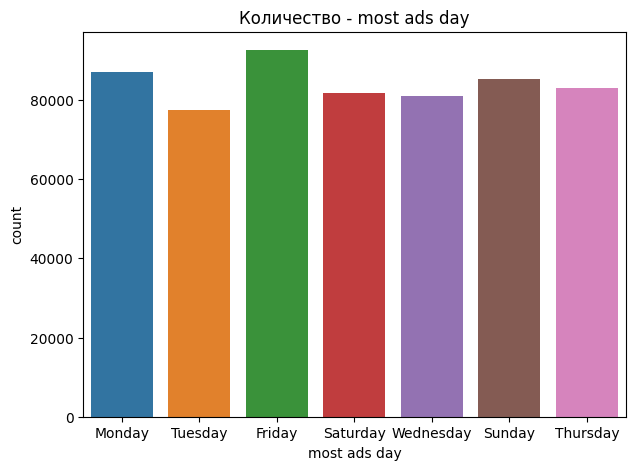

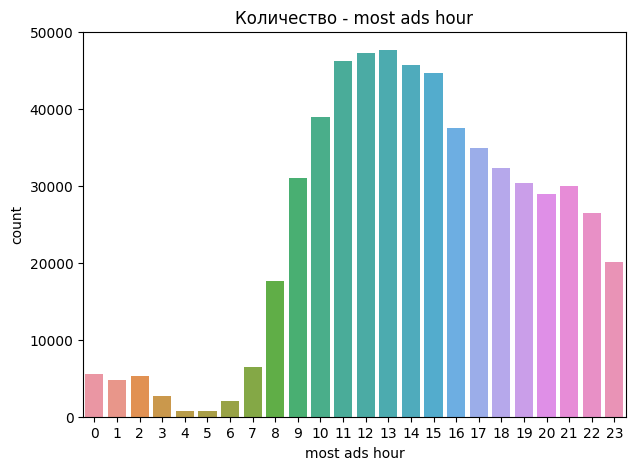

In [25]:
def val_count(column):
    plt.figure(figsize=(7,5))
    sns.countplot(data=dataframe, x=column)
    plt.title(f'Количество - {column}')
    plt.show()

col_lst = dataframe.columns[[1,2,4,5]]

for i in col_lst:
    val_count(i)

#### Промежуточный вывод: большинство пользователей видели рекламу (их больше чем тех, кто видел объявление государственной службы). Больше всего рекламы, просмотренной пользователем, произошло в пятницу, а затем в понедельник. С 10:00 до 15:00 пользователи видели больше всего рекламы

% Not converted 97.4761137967798
% Converted 2.523886203220195


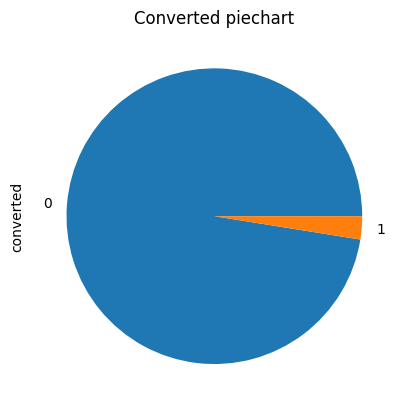

In [26]:
print("% Not converted", 100 * dataframe["converted"].value_counts()[0]/dataframe["converted"].value_counts().sum())
print("% Converted", 100 * dataframe["converted"].value_counts()[1]/dataframe["converted"].value_counts().sum())

ax = dataframe["converted"].value_counts().plot(kind="pie")
ax.set_title('Converted piechart')
plt.show()

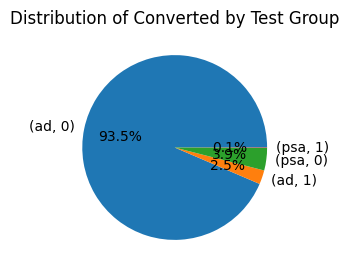

In [28]:
grouped_counts = dataframe.groupby('test group')['converted'].value_counts()
grouped_counts

# Plot the data as a pie chart
grouped_counts.plot.pie(figsize= (3,3),autopct='%1.1f%%')

# Set the title and axis labels
plt.title('Distribution of Converted by Test Group')
plt.ylabel('')

# Show the plot
plt.show()

### 3. Расчет конверсии

In [29]:
dataframe.groupby("test group")["converted"].mean()*100

test group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64

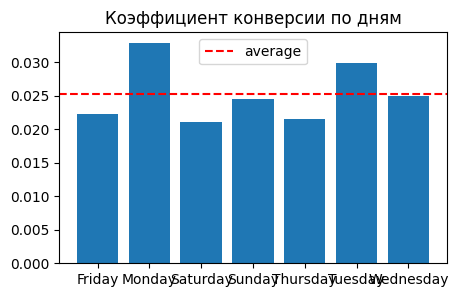

In [32]:
df_day_conv = pd.DataFrame(dataframe.groupby('most ads day')['converted'].mean())
df_day_conv.reset_index(inplace=True)

plt.figure(figsize=(5,3))
plt.bar(data=df_day_conv, x='most ads day', height='converted')
plt.title('Коэффициент конверсии по дням')
plt.axhline(dataframe['converted'].mean(), color='r', linestyle='--', label='average')
plt.legend()
plt.show()

#### Промежуточый вывод: Из этих коэффициентов конверсии можно сделать вывод, что группа рекламы достигла более высокого коэффициента конверсии (2,5547%) по сравнению с группой PSA (1,7854%). Это указывает на то, что рекламные объявления успешно генерировали конверсии и вся рекламная кампания была эффективной.

### 4. А/B тестирование

In [36]:
import math

def sample_size_calculator(population_size, confidence_level, margin_of_error):
    z_score = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }

    z = z_score[confidence_level]
    p = 0.5 # предположим 50%
    q = 1 - p

    sample_size = ((z**2) * p * q * population_size) / ((z**2 * q) + ((margin_of_error**2) * (population_size - 1)))
    return math.ceil(sample_size)

pop_size = dataframe.shape[0]
conf_level = 0.99
margin_err = 0.03

sample_size = sample_size_calculator(pop_size, conf_level, margin_err)
print(f"Размер выборки: {pop_size}")
print(f"Необходимый разме выборки: {sample_size}")

Размер выборки: 588101
Необходимый разме выборки: 1832


In [40]:
# Для запросов нам необходимо привести название колонок к единому виду с нижним почеркиванием
dataframe.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
dataframe.head(1)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,0,130,Monday,20


In [42]:
treatment = dataframe.query('test_group == "ad"')
control = dataframe.query('test_group == "psa"')
dataframe.converted.mean() *100

2.523886203220195

In [43]:
control["converted"].mean()

0.01785410644448223

In [44]:
treatment["converted"].mean()

0.025546559636683747

#### Промежумточный вывод: мы можем наблюдать, что среднее число конверсий в экспериментальной группе больше, чем в контрольной группе, что подтверждает гипотезу о том, что реклама оказывает положительное влияние на конверсию.

(array([  1.,   1.,   0.,   0.,   1.,   1.,   4.,   4.,   5.,  11.,  22.,
         20.,  48.,  59.,  95., 131., 163., 238., 284., 341., 386., 415.,
        494., 591., 632., 606., 705., 634., 601., 556., 565., 483., 376.,
        337., 291., 230., 177., 151., 105.,  75.,  50.,  35.,  22.,  17.,
         19.,   8.,   4.,   2.,   2.,   2.]),
 array([0.02433503, 0.02436883, 0.02440262, 0.02443642, 0.02447021,
        0.02450401, 0.0245378 , 0.0245716 , 0.02460539, 0.02463919,
        0.02467299, 0.02470678, 0.02474058, 0.02477437, 0.02480817,
        0.02484196, 0.02487576, 0.02490955, 0.02494335, 0.02497714,
        0.02501094, 0.02504473, 0.02507853, 0.02511232, 0.02514612,
        0.02517991, 0.02521371, 0.0252475 , 0.0252813 , 0.02531509,
        0.02534889, 0.02538268, 0.02541648, 0.02545028, 0.02548407,
        0.02551787, 0.02555166, 0.02558546, 0.02561925, 0.02565305,
        0.02568684, 0.02572064, 0.02575443, 0.02578823, 0.02582202,
        0.02585582, 0.02588961, 0.02592341, 0.

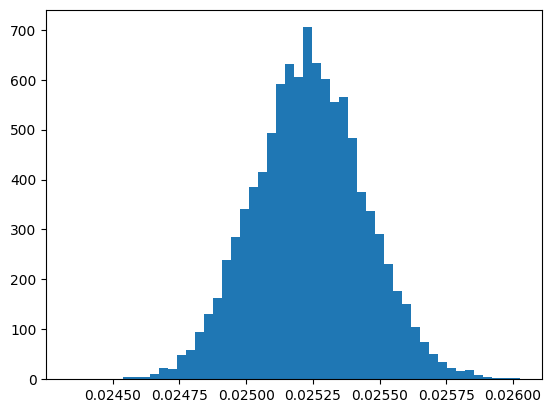

In [46]:
ad_converted = np.random.binomial(len(treatment),
                                  dataframe.converted.mean(), 10000) / len(treatment)

plt.hist(ad_converted, bins=50)

(array([  2.,   0.,   2.,   5.,   7.,   6.,  17.,  19.,  26.,  53.,  56.,
         90., 130., 109., 237., 225., 345., 372., 366., 497., 567., 473.,
        609., 451., 611., 655., 505., 607., 403., 500., 454., 272., 344.,
        245., 175., 166., 106., 100.,  62.,  33.,  42.,  24.,   7.,  13.,
          3.,   4.,   2.,   2.,   0.,   1.]),
 array([0.02146744, 0.02162132, 0.02177521, 0.02192909, 0.02208298,
        0.02223686, 0.02239075, 0.02254464, 0.02269852, 0.02285241,
        0.02300629, 0.02316018, 0.02331406, 0.02346795, 0.02362183,
        0.02377572, 0.0239296 , 0.02408349, 0.02423737, 0.02439126,
        0.02454515, 0.02469903, 0.02485292, 0.0250068 , 0.02516069,
        0.02531457, 0.02546846, 0.02562234, 0.02577623, 0.02593011,
        0.026084  , 0.02623788, 0.02639177, 0.02654566, 0.02669954,
        0.02685343, 0.02700731, 0.0271612 , 0.02731508, 0.02746897,
        0.02762285, 0.02777674, 0.02793062, 0.02808451, 0.02823839,
        0.02839228, 0.02854617, 0.02870005, 0.

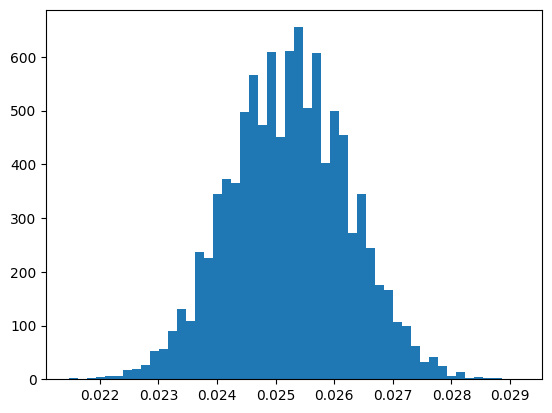

In [47]:
psa_converted = np.random.binomial(len(control),
                                   dataframe.converted.mean(), 10000) / len(control)

plt.hist(psa_converted, bins=50 ,align = 'mid' , data=None)

In [48]:
p_diffs = ad_converted - psa_converted
p_diffs
p_diffs.mean()

4.674239453448939e-06

In [49]:
ab_data_diff = treatment['converted'].mean() - control['converted'].mean()
ab_data_diff

0.007692453192201517

#### Приводит ли показ рекламы людям к большему количеству покупок? Это статистически значимо или нет? Нулевая гипотеза (H0): показ рекламы не оказывает существенного влияния на количество покупок. Альтернативная гипотеза (H1): Показ рекламы существенно влияет на количество покупок.

### 4.1 Проверка данных на нормальность

In [52]:
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind

ad_dist = dataframe[dataframe["test_group"] == 'ad'].reset_index(drop=True)
psa_dist = dataframe[dataframe["test_group"] == 'psa'].reset_index(drop=True)
_, pvalue_ad = shapiro(ad_dist.converted)
_, pvalue_psa = shapiro(psa_dist.converted)
print(pvalue_ad, pvalue_psa)

0.0 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 4.2 Проверка однородности дисперсий

In [56]:
levene(psa_dist.converted, ad_dist.converted)

LeveneResult(statistic=54.322884225785735, pvalue=1.703305262368155e-13)

#### Промежуточный вывод: результаты статистически значимы.
#### - pvalue категорически отвергает нулевую гипотезу
#### - разница в конверсиях связана с рекламой

In [55]:
converts_psa = psa_dist.groupby('converted')['user_id'].count()
converts_ad = ad_dist.groupby('converted')['user_id'].count()
(100 * converts_psa[1]/converts_psa[0]), (100 * converts_ad[1]/converts_ad[0])

(1.8178670360110802, 2.6216295800812137)

### Вывод: Группа ADS достигла более высокого уровня конверсии в 2,62%, по сравнению с уровнем группы PSA в 1,82%. Это указывает на то, что рекламная кампания была более эффективной в стимулировании конверсий по сравнению с PSA. Значение t-test p-value, равное 0,0000, указывает на то, что разница в уровнях конверсии между двумя группами является статистически значимой, что означает, что вероятность случайного возникновения этой разницы крайне мала. Это представляет собой весомые доказательства для наблюдаемой разницы между двумя группами. В целом, эти результаты свидетельствуют о том, что рекламная кампания успешно стимулировала конверсии, и разницу в уровнях конверсии между двумя группами можно объяснить воздействием рекламы.